# Udacity CRISP DM Project

For this project the data I choose is Seatle Airbnb dataset. Lets look into the dataset.

First import all the necessary library needed for this project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Lets's read in the all the  data files of seatles Airbnb and look at some of the characteristics of dataset

In [2]:
calendar = pd.read_csv('calendar.csv')
listings = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')

In [3]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [4]:
listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,2.016010e+13,1/4/2016,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,2.016010e+13,1/4/2016,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48


**1.** Here I looked the number of rows and columns in the Calendar, reviews and listings files of the dataset.

In [5]:
#review data rows and columns
print('review data rows and columns')
print('Total rows: ',reviews.shape[0])
print('Total columns: ',reviews.shape[1])
print(' \n ')
#calender data rows and columns
print('calender data rows and columns')
print('Total rows: ',calendar.shape[0])
print('Total columns: ',calendar.shape[1])

review data rows and columns
Total rows:  84849
Total columns:  6
 
 
calender data rows and columns
Total rows:  1393570
Total columns:  4


In [6]:
#lisitng data rows and columns
print('lisitng data rows and columns')
#no of rows 
print('Total rows: ',listings.shape[0])
#no of columns
print('Total columns: ',listings.shape[1])

lisitng data rows and columns
Total rows:  3818
Total columns:  92


I decided First to work with listings file so here I check the information of listings dataset

In [7]:
#information of listings dataset
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null float64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      34

Now let's explore the listing dataset. 

**Missing values**
1. How many columns have missings values?
2. How many columns have more than 75% missing values
3. How many columns that don't have any missing values?
4. How many columns are full null?
5. What are the names of those columns that don't have any missing values?
6. What are the names of those columns that have missing values?

In [8]:
#no. of columns that have missing values in listing dataset
sum(listings.isnull().any())

45

In [9]:
#no. of columns that have missing values in listing dataset
listings.columns[listings.isnull().mean() > 0.75]

Index(['square_feet', 'license'], dtype='object')

In [10]:
#no. of columns that do not have missing values
sum(listings.notnull().all())

47

In [11]:
#no. of columns that have NAN values in whole column listing dataset
sum(listings.isnull().all())

1

In [12]:
#name of colums that have missing value 0
not_null_columns = listings.columns[listings.isnull().mean() == 0]
not_null_columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'experiences_offered', 'picture_url', 'host_id', 'host_url',
       'host_verifications', 'street', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'room_type', 'accommodates', 'bed_type',
       'amenities', 'price', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'calendar_last_scraped',
       'number_of_reviews', 'requires_license', 'jurisdiction_names',
       'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count'],
      dtype='object')

In [13]:
# columns with missing values
null_columns = listings.columns[listings.isnull().any()]
null_columns

Index(['summary', 'space', 'neighborhood_overview', 'notes', 'transit',
       'thumbnail_url', 'medium_url', 'xl_picture_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'zipcode', 'property_type', 'bathrooms', 'bedrooms', 'beds',
       'square_feet', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleaning_fee', 'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'license',
       'reviews_per_month'],
      dtype='object')

Let's check the number of categorical and numerical features in listing dataset.
1. No. of categorical columns
2. No. of Numeric columns
3. Name of categorcal columns
4. Name of Numeric columns

In [14]:
#no. of categorical columns
print('Total Categorical features: ',listings.select_dtypes(include=['object']).shape[1])

Total Categorical features:  62


In [15]:
#no. of numeric columns
print('Total Numeric features:',listings.select_dtypes(include=['int','float']).shape[1])

Total Numeric features: 18


In [16]:
#name of columns that are numeric
listings.select_dtypes(include=['int','float']).columns

Index(['scrape_id', 'host_listings_count', 'host_total_listings_count',
       'latitude', 'longitude', 'bathrooms', 'bedrooms', 'beds', 'square_feet',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'reviews_per_month'],
      dtype='object')

In [17]:
#name of columns that are categorical
listings.select_dtypes(include=['object']).columns

Index(['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'is_location_exact',
       'property_type', 'room_type', 'bed_type', 'amenities', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'extra_people', 'calendar_updated', 'has_availability',
       'calendar_last_s

Here we can see that we also getting price related columns as categorical features. So lets see the price related columns

In [19]:
listings[['price','weekly_price', 'monthly_price']].head()

,price,weekly_price,monthly_price
0,$85.00,NaN,NaN
1,$150.00,"$1,000.00","$3,000.00"
2,$975.00,NaN,NaN
3,$100.00,$650.00,"$2,300.00"
4,$450.00,NaN,NaN


Here we can see that they have dollar sign with them so we need to convert them into float in order to use them for fither anaylsis.

- converting_price function to convert price to float and replace their dollar is created 

In [22]:
#fuction to convert price string to float and replacing dollar sign

def converting_price(df, col_name):
    '''
    :param dataframe df: dataframe from which the column is extracted  
    :param string column: the column name that will be converted
    :return: dataframe with updated price column value
    '''
    
    df[col_name] = df[col_name].str.replace("[$, ]", "").astype("float")
    return df

listings = converting_price(listings,'monthly_price')
listings = converting_price(listings,'price')
listings = converting_price(listings,'weekly_price')

# Question 1- Anaylsis of room types, their percentage & price range on Airbnb

**Question 1:** 
- What are the types of room on Airbnb?
- which room_type have high percentage? 
- What is the price range of these room on Airbnb?

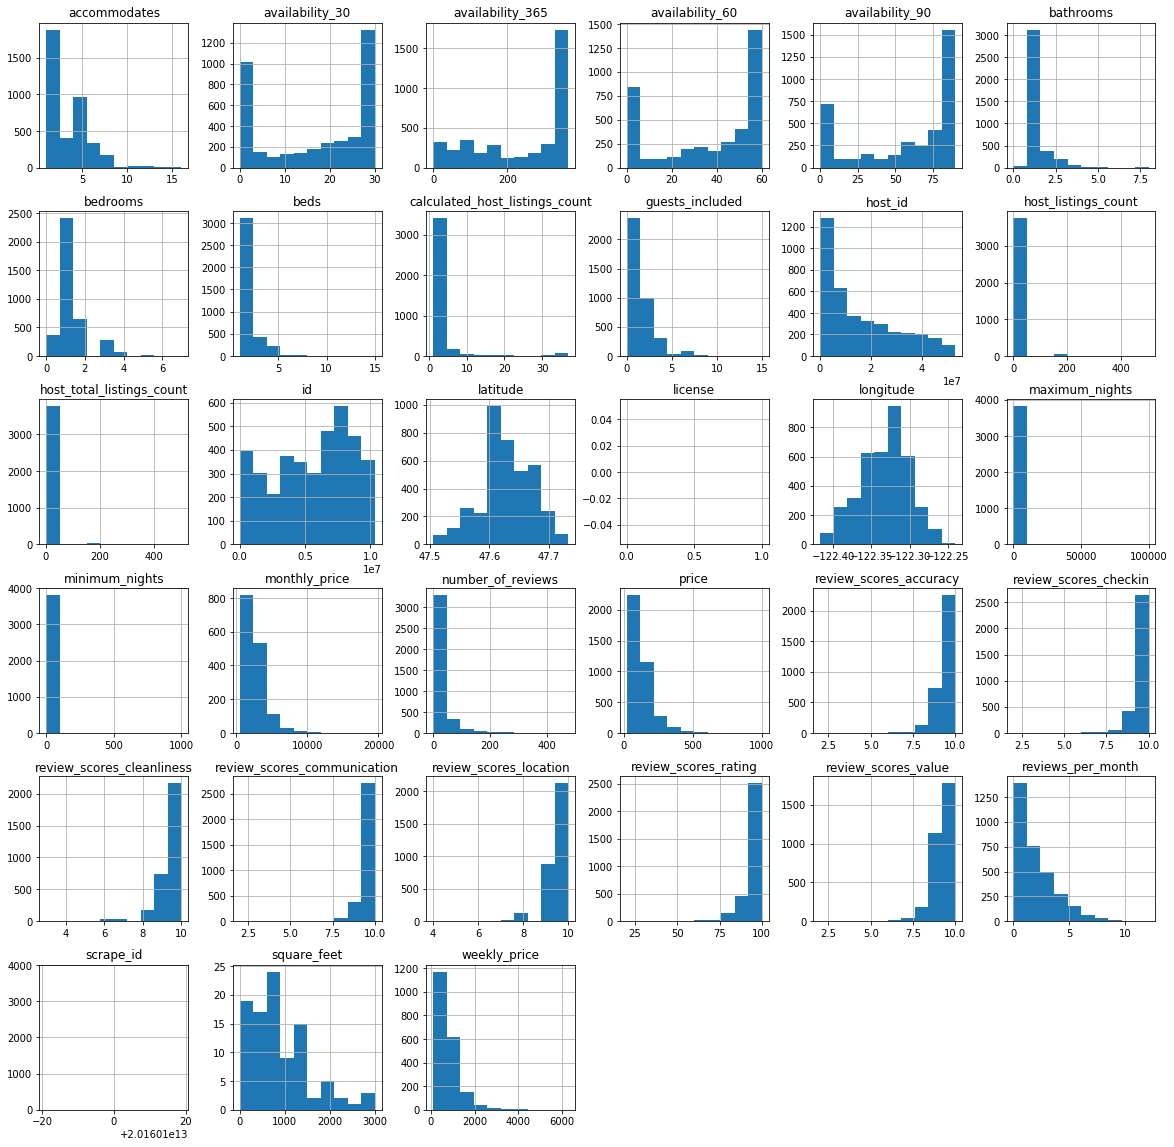

In [365]:
#histogram of listing data columns
listings.hist(figsize=(20,20));

From the above histograms,
1. the price histogram shows that to rent Airbnb in seatle the price range is mostly below \\$200 but sometime their range also go upto \\$1000. 
- we can also see from weekly price histogram that the weekly rent price for Airbnb seatle is mostly below \\$1100 and in very few events it rises upto \\$5000
- we can see from availability_365 histogram that rooms are highly available at the end of year.
- the histrom of availability_90 shows that rooms are highly available at the end of march
- we can also see from reviewers graph that they give good comments as the graph are right skewed.


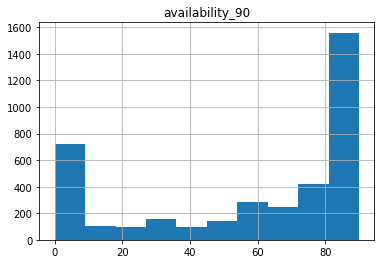

In [415]:
listings.hist('availability_90');

In order to understand answer the above questions we need to look into the room_type filed. We also need to look into the price field and shw them in graph.

In [388]:
#room type values in listings dataset
room = listings.room_type.value_counts()
print('rooms type with count')
print(room)
print(' \n')
print('proportion of rooms')
print(room/listings.shape[0])

rooms type with count
Entire home/apt    2541
Private room       1160
Shared room         117
Name: room_type, dtype: int64
 

proportion of rooms
Entire home/apt    0.665532
Private room       0.303824
Shared room        0.030644
Name: room_type, dtype: float64


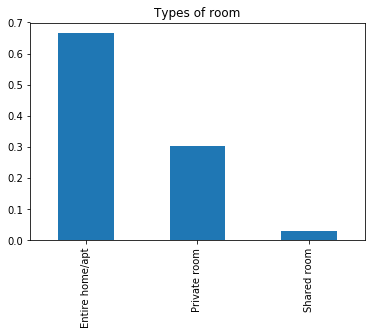

In [158]:
#bar plot of proportion of individual rooms_type in lisitngs dataset
(room/listings.shape[0]).plot(kind="bar");
plt.title("Types of room");

In [309]:
#prices per night for each room type
price_per_night = listings.groupby('room_type').mean()['price']
price_per_night

room_type
Entire home/apt    155.843369
Private room        75.044828
Shared room         47.547009
Name: price, dtype: float64

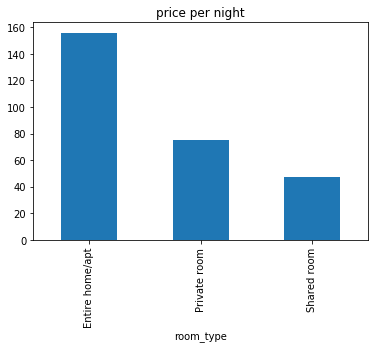

In [296]:
#bar plot of proportion of individual rooms_type in lisitngs dataset
(price_per_night).plot(kind="bar");
plt.title("price per night");

We can see from above analysis that Entire home/apt have high range on Airbnb and have \\$155 per night price for this room_type. Using this information people can plan their trip accordingly.

# Question 2: Analysis of Room availabily with months and their prices to answer what time is best to visit seatle

**Question 2:**

- What are the room availability of Airbnb and their means prices through out the year? 
- Which month have high availability for room and in which month they have high prices? 
- What is the best time to visit seatles?


We will explore the calender dataset to answer these questions.


In [54]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [55]:
#checking null column in calendar dataset
calendar.columns[calendar.isnull().any()]

Index(['price'], dtype='object')

Fisrt count the percentage of availabilty 

In [56]:
#availability of lisitngs
calendar.available.value_counts()/calendar.shape[0]

t    0.67061
f    0.32939
Name: available, dtype: float64

- 67% of time rooms are available and 33% of time they are not. Now lets see on which month they are available.
- For this we need to covert datatime and then pick the month.

In [57]:
#covert datatime object to datetime
calendar['Datetime'] = pd.to_datetime(calendar['date'], format="%Y/%m/%d")

In [58]:
#picking only month column
calendar['month'] = pd.DatetimeIndex(calendar['Datetime']).month

In [59]:
#groping only available data by month 
availability_room_by_month = calendar[calendar['available'] == 't'].groupby(['month']).count()['listing_id'].sort_values(ascending=False)
availability_room_by_month

month
12    87061
3     83938
10    82438
11    81780
5     79971
9     77246
6     77244
8     76347
4     76037
7     74222
2     73321
1     64937
Name: listing_id, dtype: int64

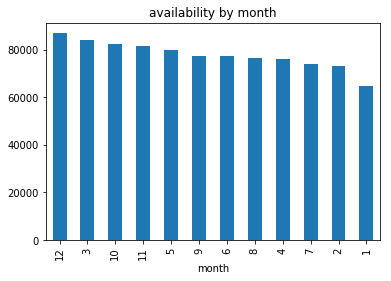

In [60]:
# bar graph of availability by month
(availability_room_by_month).plot(kind="bar");
plt.title("availability by month");

-  we can see from above graph that they are highly available through out year but in march and december avaialability is high as compared to other months and january has less availability.

Now lets see the mean price per month

In [53]:
#convertig price string using the function defined above
calendar = converting_price(calendar,'price')

In [61]:
#groping by month the mean prices 
mean_price_per_month = calendar.groupby(['month']).mean()['price'].sort_values(ascending=False)
mean_price_per_month

month
7     152.094150
8     150.656594
6     147.473137
9     143.255949
5     139.538183
12    137.251835
10    137.031939
11    135.688738
4     135.097005
3     128.644488
2     124.293927
1     122.912176
Name: price, dtype: float64

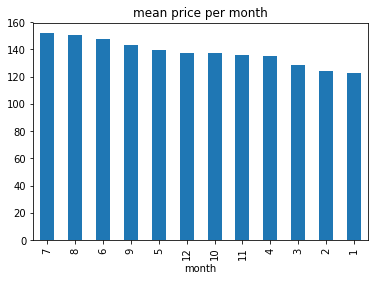

In [63]:
# bar graph of mean price per month
(mean_price_per_month).plot(kind="bar");
plt.title("mean price per month");

- we can see that prices are high is summer season and comparitively low in winter season

As we look the availability of room by month and price range by month lets look into reviwers data and see the comments of reviewers by month

In [64]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [65]:
reviews['datetime'] = pd.to_datetime(reviews['date'], format="%Y/%m/%d")

In [66]:
reviews['month'] = pd.DatetimeIndex(reviews['datetime']).month

In [67]:
#groping comments data by month 
comments_per_month = reviews.groupby(['month']).count()['comments'].sort_values(ascending=False)
comments_per_month

month
8     13017
9     11675
7     10501
10     8954
6      8542
11     6665
5      5853
12     5730
4      4231
3      4157
1      2864
2      2642
Name: comments, dtype: int64

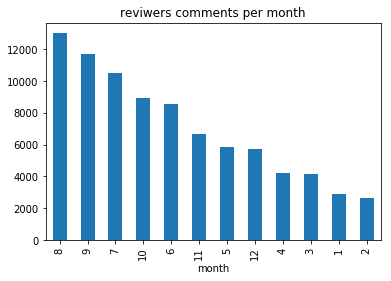

In [68]:
# bargraph of comments per month
(comments_per_month).plot(kind="bar");
plt.title("reviwers comments per month");

- we can see from this graph that most comments are from July, august and september

we can conclude from above three graph that people mostly visit Seatle in summer season from July to September. As there is crowd in these month, the prices go high. By doing this analysis we can see that people prefer going to seatle in these months.


# Question 3: Neighbourhood price Analysis

**Questios3:**

- Which neighbourhood have high prices?
- What are the top neighbourhoods location wise by looking into the reviwers location score?
- Which neighbours is high ranked by reviewrs?


First presented the neighbourhood mean price by month using the listing data

In [70]:
# grouped by neighbourhood on the base of their mean price
neibhourhood_price = listings.groupby('neighbourhood_group_cleansed').mean()['price'].sort_values(ascending=False)

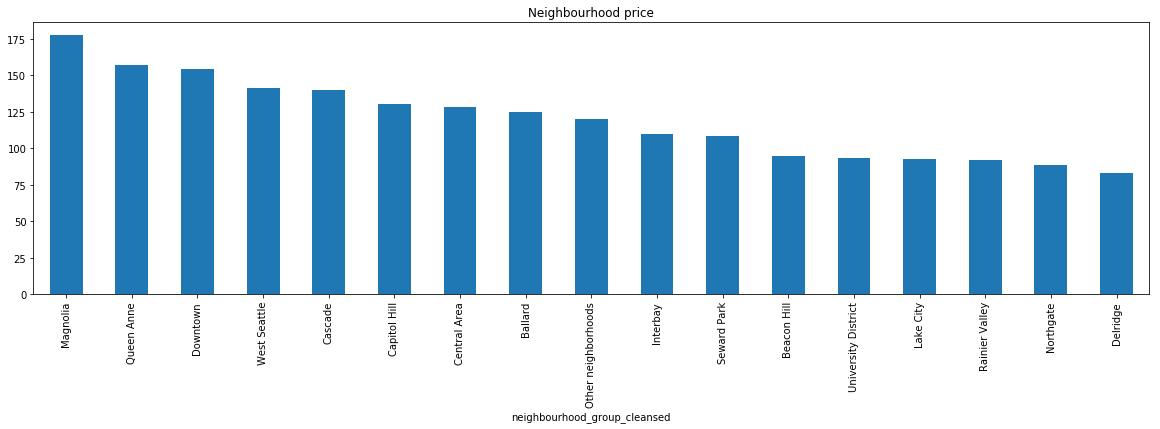

In [72]:
#bar graph
(neibhourhood_price).plot(figsize = (20,5),kind="bar");
plt.title("Neighbourhood price");

We can see from the above graph that Magnila is highly expesive.

In [73]:
neighbourhood_review_scores_location = listings.groupby('neighbourhood_group_cleansed').mean()['review_scores_location'].sort_values(ascending=False)
neighbourhood_review_scores_location

neighbourhood_group_cleansed
Capitol Hill           9.823529
Downtown               9.769737
Ballard                9.766839
West Seattle           9.765432
Queen Anne             9.751020
Other neighborhoods    9.637481
Magnolia               9.617021
Cascade                9.569231
Central Area           9.489028
Northgate              9.353846
Seward Park            9.282051
Lake City              9.267857
University District    9.252632
Delridge               9.200000
Interbay               9.111111
Beacon Hill            9.097087
Rainier Valley         9.052239
Name: review_scores_location, dtype: float64

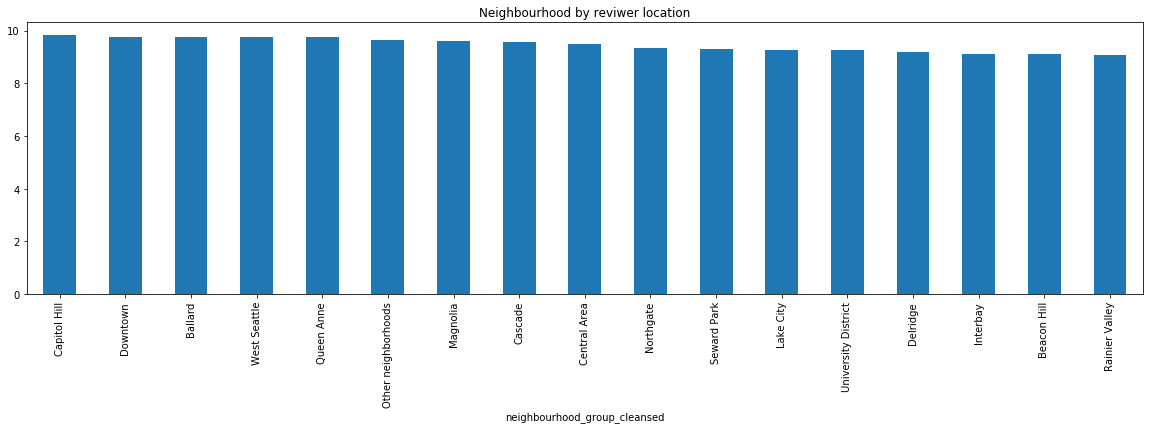

In [74]:
#bar graph
(neighbourhood_review_scores_location).plot(figsize = (20,5),kind="bar");
plt.title("Neighbourhood by reviwer location");

- we can see from above graph that Capitol Hill, Down Town and Ballard are in top three location wise

In [76]:
neighbourhood_review_scores_rating = listings.groupby('neighbourhood_group_cleansed').mean()['review_scores_rating'].sort_values(ascending=False)
neighbourhood_review_scores_rating


neighbourhood_group_cleansed
Central Area           96.009404
West Seattle           95.864198
Delridge               95.861538
Ballard                95.533679
Queen Anne             95.443089
Seward Park            95.025641
Rainier Valley         94.731343
Northgate              94.692308
Other neighborhoods    94.562500
Lake City              94.375000
Capitol Hill           94.184783
Beacon Hill            94.019417
Downtown               93.958333
Magnolia               93.787234
Interbay               93.777778
Cascade                92.461538
University District    88.437500
Name: review_scores_rating, dtype: float64

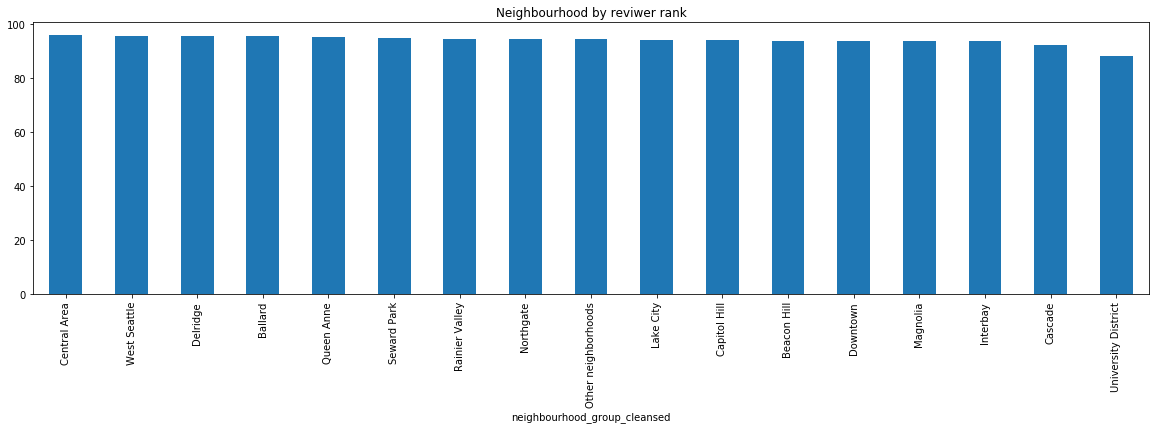

In [77]:
#bar graph
(neighbourhood_review_scores_rating).plot(figsize = (20,5),kind="bar");
plt.title("Neighbourhood by reviwer rank");

While the Cebtral Area, west Seatle and Delrige are in top 3 higly rank list.

From the above three graph we can concluse that as Mangolia is most expesive place but its not in coming in the top 3 of reviwers location and rank. On the ohter hand Ballard is in top 3 location wise and in top 4 rank wise and it also have low price as compared to others.
so I think the best neighbourhood to visit is Ballard. 